In [16]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
import pydov
from owslib.fes import PropertyIsEqualTo
from pydov.search.grondwaterfilter import GrondwaterFilterSearch

In [18]:
gwfilter = GrondwaterFilterSearch()

query = PropertyIsEqualTo(
            propertyname='pkey_filter',
            literal='https://www.dov.vlaanderen.be/data/filter/1992-011802')

df = gwfilter.search(query=query)
df.head()

[000/001] c


,pkey_filter,pkey_grondwaterlocatie,gw_id,filternummer,filtertype,x,y,mv_mtaw,gemeente,meetnet_code,aquifer_code,grondwaterlichaam_code,regime,diepte_onderkant_filter,lengte_filter,datum,tijdstip,peil_mtaw,betrouwbaarheid,methode
0,https://www.dov.vlaanderen.be/data/filter/1992...,https://www.dov.vlaanderen.be/data/put/2018-00...,PLAP011,1,peilfilter,219560.0,209900.0,0.0,Overpelt,9,0000,NaN,onbekend,0.93,0.3,1992-01-13,NaN,-0.32,onbekend,NaN
1,https://www.dov.vlaanderen.be/data/filter/1992...,https://www.dov.vlaanderen.be/data/put/2018-00...,PLAP011,1,peilfilter,219560.0,209900.0,0.0,Overpelt,9,0000,NaN,onbekend,0.93,0.3,1992-02-10,NaN,-0.34,onbekend,NaN
2,https://www.dov.vlaanderen.be/data/filter/1992...,https://www.dov.vlaanderen.be/data/put/2018-00...,PLAP011,1,peilfilter,219560.0,209900.0,0.0,Overpelt,9,0000,NaN,onbekend,0.93,0.3,1992-03-06,NaN,-0.32,onbekend,NaN
3,https://www.dov.vlaanderen.be/data/filter/1992...,https://www.dov.vlaanderen.be/data/put/2018-00...,PLAP011,1,peilfilter,219560.0,209900.0,0.0,Overpelt,9,0000,NaN,onbekend,0.93,0.3,1992-04-02,NaN,-0.27,onbekend,NaN
4,https://www.dov.vlaanderen.be/data/filter/1992...,https://www.dov.vlaanderen.be/data/put/2018-00...,PLAP011,1,peilfilter,219560.0,209900.0,0.0,Overpelt,9,0000,NaN,onbekend,0.93,0.3,1992-05-06,NaN,-0.29,onbekend,NaN


In [138]:
df['mv_mtaw']

Date
1992-01-13    0.0
1992-02-10    0.0
1992-03-06    0.0
1992-04-02    0.0
1992-05-06    0.0
1992-06-18    0.0
1992-07-16    0.0
1992-08-28    0.0
1992-09-29    0.0
1992-12-19    0.0
1993-02-08    0.0
1993-03-06    0.0
1993-04-08    0.0
1993-06-15    0.0
1993-07-19    0.0
1993-08-20    0.0
1993-09-21    0.0
1993-10-10    0.0
1993-11-11    0.0
1993-12-06    0.0
1994-01-10    0.0
1994-02-09    0.0
1994-03-11    0.0
1994-04-10    0.0
1994-05-12    0.0
1994-06-16    0.0
1994-07-17    0.0
1996-08-15    0.0
1996-09-10    0.0
1996-10-30    0.0
             ... 
2013-02-02    0.0
2013-03-02    0.0
2013-04-06    0.0
2013-05-11    0.0
2013-06-01    0.0
2013-07-07    0.0
2013-08-03    0.0
2013-09-07    0.0
2013-10-05    0.0
2013-11-02    0.0
2013-12-14    0.0
2014-01-10    0.0
2014-02-02    0.0
2014-03-08    0.0
2014-04-13    0.0
2014-05-12    0.0
2014-06-14    0.0
2014-07-12    0.0
2014-08-16    0.0
2014-09-13    0.0
2014-10-11    0.0
2014-11-08    0.0
2014-12-06    0.0
2015-01-10    0.0
2015-

In [ ]:
df['datum'] = pd.to_datetime(df['datum'])
df = df.set_index('datum')

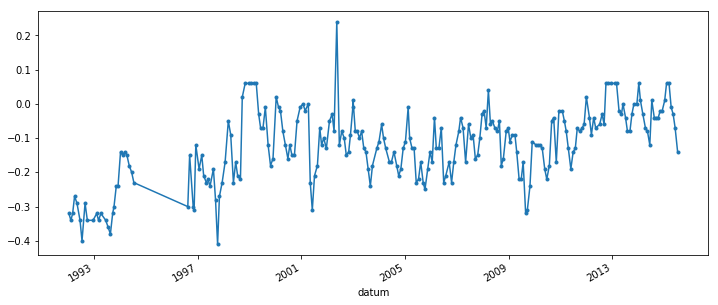

In [21]:
df['peil_mtaw'].plot(style='.-', figsize=(12, 5))

In [23]:
df['peil_mtaw'].head()

datum
1992-01-13   -0.32
1992-02-10   -0.34
1992-03-06   -0.32
1992-04-02   -0.27
1992-05-06   -0.29
Name: peil_mtaw, dtype: float64

In dbase, the mv_mtaw is defined as 0, whereas the estimated value using the DEM is 48.93 mTAW. So, in order to get a number of m estmate:

> Huidig maaiveld bepaald met DHMV II: Maaiveld (mTAW):	48,93

In [167]:
df['peil_m'] = 48.93 + df['peil_mtaw']

Convert to Pandas object

In [180]:
import pastas as ps

In [185]:
df_gwdata = df['peil_m']["2008":]
df_gwdata = df_gwdata.asfreq('D')

In [186]:
gwdata = ps.TimeSeries(df_gwdata, 
                        name="Groundwater Level", 
                        fill_nan="drop")

INFO: Inferred frequency from time series Groundwater Level: freq=D 
INFO: 2643 nan-value(s) was/were found and filled with: drop


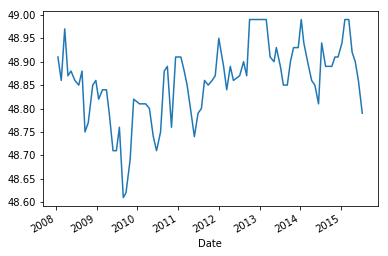

In [187]:
gwdata.plot()

### Evapotranspiration

In [151]:
import requests
import pandas as pd
import json

response_ep = requests.get("https://download.waterinfo.be/tsmdownload/KiWIS/KiWIS?type=queryServices&service=kisters&request=getTimeseriesvalues&ts_id=94538042&format=json&datasource=1&returnfields=Timestamp%2CValue%2CQuality%20Code&from=1993-01-01%2001%3A00%3A00&to=2015-08-01%2002%3A00%3A00")

In [60]:
evapotranspiration = pd.DataFrame(response_ep.json()[0]['data'], 
                                  columns=response_ep.json()[0]['columns'].split(","))
evapotranspiration['Timestamp'] = pd.to_datetime(evapotranspiration['Timestamp'])
evapotranspiration = evapotranspiration.set_index('Timestamp')

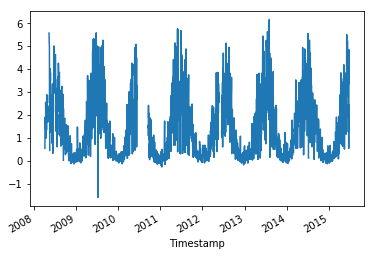

In [81]:
evapotranspiration["Value"].plot()

In [154]:
evap = evapotranspiration["Value"].dropna()/1000.
evap = evap.asfreq('D')

In [155]:
evap.head()

Timestamp
2008-04-04 23:00:00    0.00056
2008-04-05 23:00:00    0.00192
2008-04-06 23:00:00    0.00146
2008-04-07 23:00:00        NaN
2008-04-08 23:00:00        NaN
Freq: D, Name: Value, dtype: float64

### Precipitation

In [193]:
response_rf = requests.get("https://download.waterinfo.be/tsmdownload/KiWIS/KiWIS?type=queryServices&service=kisters&request=getTimeseriesvalues&ts_id=35177042&format=json&datasource=1&returnfields=Timestamp%2CValue%2CQuality%20Code&from=1993-01-01%2001%3A00%3A00&to=2015-08-01%2002%3A00%3A00")

In [194]:
rainfall = pd.DataFrame(response_rf.json()[0]['data'], 
                        columns=response_rf.json()[0]['columns'].split(","))
rainfall['Timestamp'] = pd.to_datetime(rainfall['Timestamp'])
rainfall = rainfall.set_index('Timestamp')

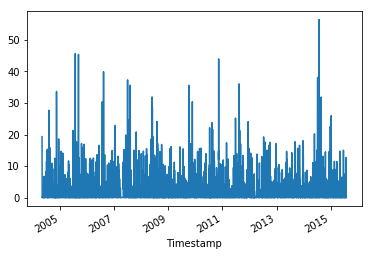

In [195]:
rainfall["Value"].plot()

In [196]:
precip = rainfall["Value"]["2008":]/1000.  # mm -> m
precip = precip.asfreq('D')

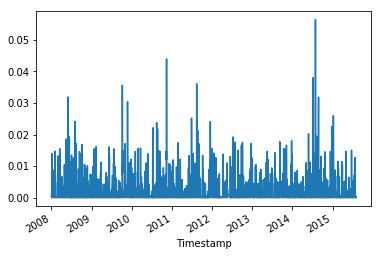

In [197]:
precip.plot()

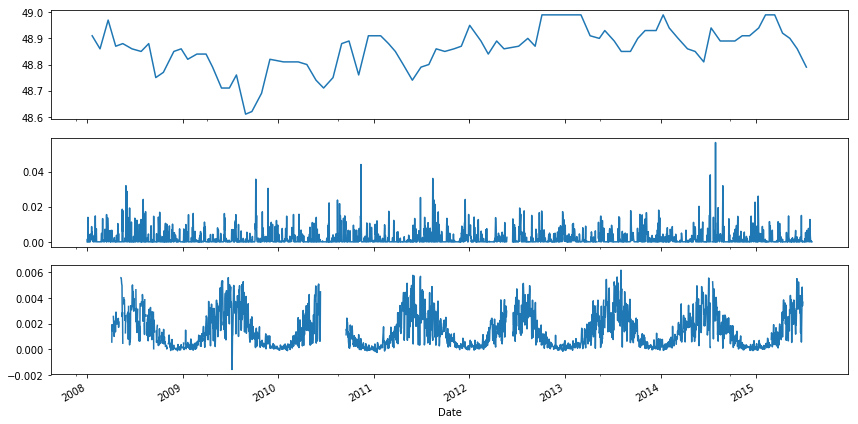

In [198]:
fig, ax = plt.subplots(3, 1, figsize=(12, 6), sharex=True)
gwdata.plot(ax=ax[0])
precip.plot(ax=ax[1])
evap.plot(ax=ax[2])
fig.tight_layout()

## Model

In [192]:
type(precip)

pandas.core.series.Series

In [219]:
gwdata.series_original.dropna()

Date
2008-01-21    48.91
2008-02-20    48.86
2008-03-22    48.97
2008-04-20    48.87
2008-05-17    48.88
2008-06-21    48.86
2008-07-26    48.85
2008-08-24    48.88
2008-09-20    48.75
2008-10-19    48.77
2008-11-28    48.85
2008-12-26    48.86
2009-01-20    48.82
2009-02-24    48.84
2009-03-31    48.84
2009-04-25    48.79
2009-05-29    48.71
2009-06-28    48.71
2009-07-25    48.76
2009-08-29    48.61
2009-09-22    48.62
2009-10-29    48.69
2009-11-30    48.82
2010-01-21    48.81
2010-02-21    48.81
2010-03-18    48.81
2010-04-20    48.80
2010-05-25    48.74
2010-06-23    48.71
2010-07-29    48.75
              ...  
2013-02-02    48.99
2013-03-02    48.99
2013-04-06    48.91
2013-05-11    48.90
2013-06-01    48.93
2013-07-07    48.89
2013-08-03    48.85
2013-09-07    48.85
2013-10-05    48.90
2013-11-02    48.93
2013-12-14    48.93
2014-01-10    48.99
2014-02-02    48.94
2014-03-08    48.90
2014-04-13    48.86
2014-05-12    48.85
2014-06-14    48.81
2014-07-12    48.94
2014-08-16    4

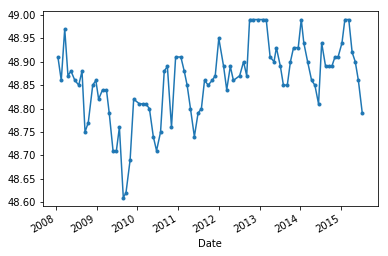

In [216]:
gwdata.plot(original = True, style='.-')

In [221]:
ps.Model(df["peil_m"].asfreq('M'))

INFO: Inferred frequency from time series peil_m: freq=M 
INFO: 166 nan-value(s) was/were found and filled with: drop


/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/inbobase/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Model(oseries=peil_m, name=peil_m, constant=True, noisemodel=True)

In [222]:
# Create a model object by passing it the observed series
ml2 = ps.Model(df["peil_m"].asfreq('M'))

# Add the recharge data as explanatory variable
ts1 = ps.StressModel2([precip, evap], ps.Gamma, 
                      name='rainevap', settings=("prec", "evap"))
ml2.add_stressmodel(ts1)

INFO: Inferred frequency from time series peil_m: freq=M 
INFO: 166 nan-value(s) was/were found and filled with: drop
INFO: Inferred frequency from time series Value: freq=D 
INFO: 32 nan-value(s) was/were found and filled with: 0.0
INFO: Inferred frequency from time series Value: freq=D 
INFO: 213 nan-value(s) was/were found and filled with: interpolate


/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/inbobase/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [223]:
ml2.get_tmax()

Timestamp('2011-06-30 00:00:00')

In [225]:
# Solve the model
ml2.solve(tmin="2011", tmax="2015", warmup=100)

INFO: There are observations between the simulation timesteps. Linear interpolation between simulated values is used.


/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/inbobase/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


ValueError: array of sample points is empty

In [178]:
# Plot the results
ml2.plot()

# Statistics
ml2.stats.summary()

INFO: Inferred frequency from time series Value: freq=D 
INFO: 32 nan-value(s) was/were found and filled with: 0.0
INFO: Inferred frequency from time series Value: freq=D 
INFO: 213 nan-value(s) was/were found and filled with: interpolate
INFO: There are observations between the simulation timesteps. Linear interpolation between simulated values is used.


/home/stijn_vanhoey/.pyenv/versions/miniconda3-4.3.11/envs/inbobase/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


ValueError: array of sample points is empty